# TF - IDF (Term Frequency Inverse Document Frequency)

![title](img/1.png)

In [1]:
# Load libraries
import glob, os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
# from nltk.book import *
# nltk.download('stopwords')

In [2]:
# Some Control Variables 
ref_source_folder = r'/home/cat/Tuli/AnalysisFall2018/data/ref/'
hyp_source_folder = r'/home/cat/Tuli/AnalysisFall2018/data/hyp/'

CWD = r'/home/cat/Tuli/AnalysisFall2018/plots/'
stop_words =set(stopwords.words('english'))
TOP_N = 30

In [3]:
def get_txt_filenames(source):
    os.chdir(source)
    return [source + file for file in glob.glob("*.txt")]

In [4]:
def get_contents(filename):
    with open(filename, 'rb') as f:
        return str(f.read())

In [5]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [6]:
def plot_tfidf_classfeats_h(dfs, name):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
#     fig = plt.figure(figsize=(120, 90), facecolor="w")
    fig = plt.figure()
    fig, ax = plt.subplots(1, len(dfs))
    x = np.arange(len(dfs[0]))
    for key, df in dfs.items():
        ax[key].spines["top"].set_visible(False)
        ax[key].spines["right"].set_visible(False)
        ax[key].set_frame_on(True)
        ax[key].get_xaxis().tick_bottom()
        ax[key].get_yaxis().tick_left()
        ax[key].set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax[key].set_title("label = " + str(key), fontsize=16)
        ax[key].ticklabel_format(axis='x', style='sci', scilimits=(-4,4))
        ax[key].barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax[key].set_yticks(x)
        ax[key].set_ylim([-1, x[-1]+1])
        yticks = ax[key].set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.savefig('{}.png'.format(name), format='png', dpi=1000)
    
    plt.show()
    

In [7]:
def remove_stopwords(string):
    return " ".join([word for word in string.split() if word not in stop_words])

In [8]:
def getWordDetectionPercentage(ref_data, hyp_data):
    ref = set(' '.join(ref_data).split())
    hyp = set(' '.join(hyp_data).split())
    
    not_detected = ref - hyp
    detection_percentage = (len(ref) - len(not_detected)) * 100.0/len(ref)
    
    print("{} % of keywords detected from reference".format(detection_percentage))
    
    if not_detected:
        print("There were a few undetected keywords")
#         analyse(list(not_detected))
        return not_detected

In [9]:
def drive(data, name):
    # Create the tf-idf feature matrix
    tfidf = TfidfVectorizer()
    feature_matrix = tfidf.fit_transform(data)

    # Show tf-idf feature matrix
    feature_matrix.toarray()

    # Show tf-idf feature matrix
    tfidf.get_feature_names()

    # Create data frame
    words = pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())

    os.chdir(CWD)

    top_ns = { key : top_tfidf_feats(words.iloc[key], words.columns, top_n=TOP_N) for key in range(len(words))}
    plot_tfidf_classfeats_h(top_ns, name)

![title](img/2.jpeg)

## Let's try  this out for Evolutionary Biology 

In [10]:
ref_input_files = get_txt_filenames(ref_source_folder)
ref_input_files

['/home/cat/Tuli/AnalysisFall2018/data/ref/BIOL265_REF_11062018_cleaned.txt',
 '/home/cat/Tuli/AnalysisFall2018/data/ref/BIOL265_REF_10112018_cleaned.txt',
 '/home/cat/Tuli/AnalysisFall2018/data/ref/BIOL265_CF_10252018_REF_cleaned.txt']

In [11]:
hyp_input_files = get_txt_filenames(hyp_source_folder)
hyp_input_files

['/home/cat/Tuli/AnalysisFall2018/data/hyp/BIOL265_MSPPT_10112018_HYP_cleaned.txt',
 '/home/cat/Tuli/AnalysisFall2018/data/hyp/BIOL265_MSPPT_11062018_HYP_cleaned.txt',
 '/home/cat/Tuli/AnalysisFall2018/data/hyp/BIOL265_MSPPT_10252018_HYP_cleaned.txt']

In [12]:
ref_data = [get_contents(filename)[2:-1] for filename in ref_input_files]
hyp_data = [get_contents(filename)[2:-1] for filename in hyp_input_files]

<Figure size 432x288 with 0 Axes>

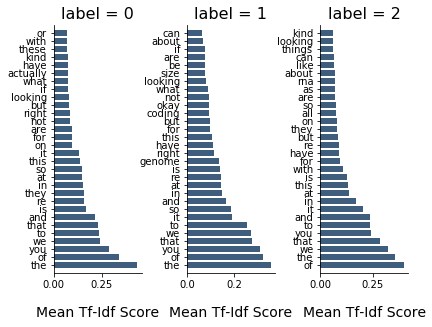

In [13]:
drive(ref_data, "EvolutionaryBiologyReferenceData")

<Figure size 432x288 with 0 Axes>

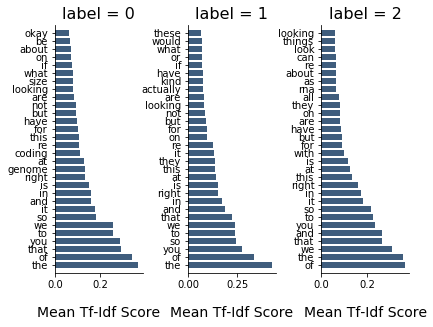

In [14]:
drive(hyp_data, "EvolutionaryBiologyHypothesisData")

In [15]:
ref_data = [remove_stopwords(document) for document in ref_data]
hyp_data = [remove_stopwords(document) for document in hyp_data]

<Figure size 432x288 with 0 Axes>

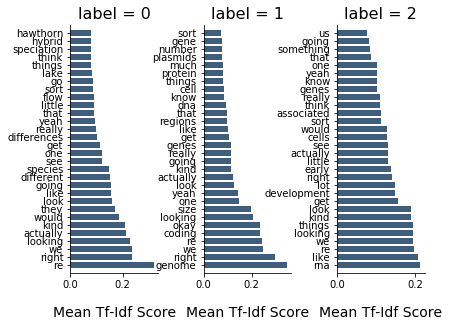

In [16]:
drive(ref_data, "EvolutionaryBiologyReferenceDataWithoutStopWords")

<Figure size 432x288 with 0 Axes>

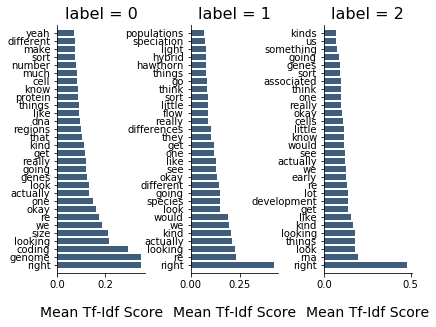

In [17]:
drive(hyp_data, "EvolutionaryBiologyHypothesisDataWithoutStopWords")

In [18]:
# def analyse(words):
    

In [19]:
getWordDetectionPercentage(ref_data, hyp_data)

88.75144955546966 % of keywords detected from reference
There were a few undetected keywords


{"'80s",
 '100000',
 '12-legged',
 '120millimeter',
 '13th',
 '1800',
 '1850',
 '1950s',
 '2018',
 '32000',
 '32n',
 '3d',
 '46',
 '800',
 '830',
 '\\n',
 'a-u',
 'accumulated',
 'actg',
 'advanced',
 'advantages',
 'ah',
 'ahead',
 'antennae',
 'anteriorposterior',
 'anyhoo',
 'apoptosis',
 'apply',
 'audience',
 'audubon',
 'aw',
 'backtracked',
 'bah',
 'barriers',
 'bellyyellowbelly',
 'benefitted',
 'billion',
 'biofilm',
 'birthday',
 'blastulas',
 'bookending',
 'bumblebees',
 'butt',
 'calculated',
 'carbon-carbon',
 'catalysts',
 'cell-based',
 'chains',
 'chapterrelated',
 'checkin',
 'chest',
 'chloroplast',
 'chowing',
 'circle',
 'clabeled',
 'clearcut',
 'cliques',
 'coevolutionary',
 'colony',
 'colorblind',
 'commonalities',
 'connelly',
 'cory',
 'cross',
 'crosspollinate',
 'cs',
 'currents',
 'cvalue',
 'daughter',
 'deal-breaker',
 'deep-dive',
 'defined',
 'desk',
 'dna-based',
 'donuts',
 'doth',
 'dr',
 'due',
 'dweller',
 'echinoderm',
 'ecoli',
 'ecology',
 'ec